In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from astropy.constants import R_jup, R_sun, R_earth, au, M_sun
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
from numpy import pi
from scipy import optimize
import bateman as bt
import thermalization as th
import heat_alpha as ht
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
kb =1.38064852e-16
h = 6.6266885e-27
c = 2.99792458e10
eV = 1.60218e-12
MeV = 1.0e6*eV
me = 9.10938356e-28
e = 4.803204e-10
mu = 1.66054e-24
day = 86400.
Msun = 1.9885e33

In [20]:
fkappa = pd.read_csv('input_files/effective_kappa_A85_238.dat',delim_whitespace=True,header=None)
kappa_effs = 0.02*np.ones((240,100))
for i in range(0,len(fkappa)):
    A = fkappa[0][i]
    Z = fkappa[1][i]
    kappa = fkappa[3][i]
    kappa_effs[A][Z] = kappa
#    print A, Z, kappa_effs[A][Z]
ffraction = pd.read_csv('input_files/each_ejecta_A238_lod.dat',delim_whitespace=True,header=None)

In [22]:
Mej = 0.05*Msun
vej = 0.1*c

alpha_max = 4.
alpha_min = 1.0
n = 4.5

Amin = 88
Amax = 238

Yas = np.zeros(239)
Yas[222] = 4.0e-5
Yas[223] = 2.7e-5
Yas[224] = 4.1e-5
Yas[225] = 2.7e-5

In [23]:
beta = ht.calc_heating_rate(Mej,vej, Amin,Amax,ffraction,kappa_effs,alpha_max,alpha_min,n)

total time step =  44


In [14]:
alpha = ht.calc_heating_rate_alpha(Mej,vej, Amin,Amax,ffraction,Yas,kappa_effs,alpha_max,alpha_min,n)

222  number of chains: 1
total time step =  49
223  number of chains: 1
total time step =  49
224  number of chains: 2
total time step =  49
225  number of chains: 2
total time step =  49
end


In [24]:
data = {'t':beta['t'],'total':beta['total'],'gamma':beta['gamma'], 'electron':beta['electron'], 'gamma_th':beta['gamma_th'],'electron_th':beta['electron_th']}
df = pd.DataFrame(data=data)
df.to_csv('output_files/heat_beta_88_209_M001_v04_v1_n45.dat',sep=" ",index=False,header=None,columns=['t', 'total', 'gamma', 'electron','gamma_th','electron_th'])

In [27]:
data = {'t':alpha['t'],'total':alpha['total'],'alpha':alpha['alpha'],'gamma':alpha['gamma'], 'electron':alpha['electron'],'alpha_th':alpha['alpha_th'], 'gamma_th':alpha['gamma_th'],'electron_th':alpha['electron_th']}
df = pd.DataFrame(data=data)
df.to_csv('output_files/heat_alpha_Wu19_88_209_M001_v04_v1_n45.dat',sep=" ",index=False,header=None,columns=['t', 'total', 'alpha', 'gamma', 'electron','alpha_th','gamma_th','electron_th'])

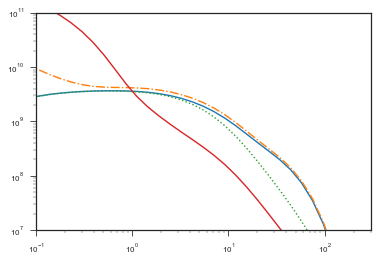

In [16]:
plt.ylim(1.0e7,1.0e11)
plt.xlim(0.1,300.)
plt.loglog(alpha['t'],np.multiply(alpha['alpha'],1.))
plt.loglog(alpha['t'],np.multiply(alpha['total'],1.),linestyle='-.')
#plt.loglog(np.multiply(ts,1./day),tmps,linestyle='-.')
plt.loglog(alpha['t'],np.multiply(alpha['alpha_th'],1.),linestyle=':')
plt.loglog(beta['t'],np.multiply(beta['electron_th'],1.),linestyle='-')
#plt.loglog(alpha['t'],fp(np.array(alpha['t'])),linestyle=':')
#plt.loglog(np.multiply(ts,1./day),tmp2s,linestyle='-')
#plt.loglog(np.multiply(ts,1./day),np.multiply(total_elect_ths,Mej))
#plt.loglog(np.multiply(ts,1./day),np.multiply(total_elects,Mej))
#plt.loglog(np.multiply(ts,1./day),f(np.multiply(ts,1./day)))
plt.savefig('tmp.pdf')
plt.show()